### Основные шаги обработки эксперимента с ментальными задачами

В ходе данного исследования  был проведен эксперимент, направленный на стимуляцию процессов
вспоминания и воображения у испытуемых. 

Эксперимент состоял из трех видов заданий: на память, воображение и
сенсорное восприятие и трех соответствующих им контрольных заданий.
Каждое задание предъявлялось отдельным блоком, состоящим из 40-80 проб.
В общем виде проба состоит из вербального стимула и белого экрана или
слайда с изображением. 
<img src="ExperimentDescription.jpg" style="width:70%">

 ***Общая схема пробы.*** Длительность проб – 6500 мс, престимульный
интервал – 300 мс, длительность первого (вербального) стимула - 400 мс,
длительность второго стимула (изображение) 5000 мс, длительность интервала
между двумя стимулами в паре – 800 мс. Интервал между пробами
рандомизирован – от 700 мс до 1000 мс.

В задании на сенсорное восприятие испытуемому в качестве
вербального стимула предъявлялось некое слово.Затем необходимо было
рассмотреть и запомнить картинку, соответствующую этому вербальному
стимулу, и нажать на кнопку после картинки.  В задание на память или репродуктивное воображение также
предъявлялось слово в качестве вербального стимула, затем при
предъявлении белого экрана испытуемому необходимо было вспомнить и
визуализировать картинку, соответствующую предъявленному вербальному
стимулу, и нажать на кнопку, если визуализация удалась.
Продуктивное или творческое воображение подразумевало задачу
придумать и визуализировать химерное изображение. Здесь вербальный
стимул содержал уже два слова. Далее, на фоне белого экрана испытуемый
должен был вспомнить ранее предъявленные изображения, соответствующие
этим словам, придумать и визуализировать на белом экране некий химерный
объект из двух изображений. А также нажать на кнопку, если удалось
выполнить задание.
В контрольных блоках инструкция к заданию отсутствовала. Таким
образом, испытуемые после вербального стимула рассматривали картинку
или смотрели на белый экран, а после него нажимали кнопку.


### Этап 1. Препроцессинг  данных

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from collections import defaultdict
%matplotlib inline

In [ ]:
## Данные эксперимента содержаться в файле Log: 
df_logFile = pd.read_excel('Log file.xlsx').iloc[:,:3]
print(df_logFile.head(10))
# Соберем табличку без контролей:
df_filtered = df_logFile.loc[df_logFile ['Task'].isin(['Im','Mem', 'Sl'])]
print(df_filtered.head())

In [ ]:
# Статистика по данным:
print(df_filtered.groupby('Task').count())
# Количество уникальных испытуемых
Names = np.unique(df_filtered['Name'])
print(' Уникальных испытуемых всего:',len(Names))

### Этап 2. Нормализация по всем людям эксперимента
Загружаем, выравниваем, собираем каждого человечка в массив: [каналы, проба, число проб]. Рисуем среднюю ERP по по всем людям. Дописываем все функции в класс EEGAnalyser

In [ ]:
# выкинем сначала лишние текстовые документики
#!find DATA -maxdepth 1  -iname "*.csv*" -type f -delete

In [13]:
import os.path
filename = 'DATA/EEG_MentalInfo.pickle'
if os.path.isfile(filename):
    with open(filename, 'rb') as f:
        EEG_info = pickle.load(f)
else:
    list_Im = list(df_filtered.Number.loc[df_logFile ['Task'] == 'Im'])
    list_Mem = list(df_filtered.Number.loc[df_logFile ['Task'] == 'Mem'])
    list_Sl = list(df_filtered.Number.loc[df_logFile ['Task'] == 'Sl'])
    EEG_info = {'Table': df_logFile,'list_Im':list_Im, 'list_Mem': list_Mem, 'list_Sl': list_Sl}
    with open(filename, 'wb') as f:
        pickle.dump(EEG_info, f)
Im_names = EEG_info['list_Im']
Mem_names = EEG_info['list_Mem']
Sl_names = EEG_info['list_Sl']        

In [36]:
#Im_names 

In [7]:
import os.path
import sys
home = str(os.path.expanduser("~"))
path_to_class = os.path.join(home,'PycharmProjects/EEGAnalyser/')
sys.path.append(path_to_class)
from EEGProcessing import EEGAnalyser

In [9]:
def path_define(name):
    sig_number = 'D0000'+str(name)
    sigName = 'DATA/CSV/'+ sig_number +'.csv'
    timingName = 'DATA/timing/'+sig_number+'.TXT'
    failedTrialsName = 'DATA/failed_trials/'+sig_number+'.txt'
    return sigName, timingName, failedTrialsName

In [10]:
#Нам нужно найти самую короткую пробу по всем испытуемым, для этого можно взять все данные с таймингами и найти самый короткий
#!head -5 DATA/timing/D0000418.TXT

In [11]:
# Ищем минимальгую длину триала EEGAnalyser
timingPath = 'DATA/timing/'
myExperiment = EEGAnalyser(srate = 500,min_freq = 4, max_freq=30, num_freq=10)
min_trial_len = myExperiment.find_minimal_trial(timingPath)
print(myExperiment.min_length)

3480


In [43]:
myExperiment.freq

array([ 4.        ,  5.00367416,  6.25918877,  7.82973528,  9.79436103,
       12.2519478 , 15.32618865, 19.17181353, 23.98237698, 30.        ])

In [14]:
#Загружаем данные
name = Im_names[0]
sigName, timingName, failedTrialsName = path_define(name)
print(sigName)
data = myExperiment.load_data(sigName, timingName, failedTrialsName)
data = myExperiment.normalize_data()

DATA/CSV/D0000418.csv


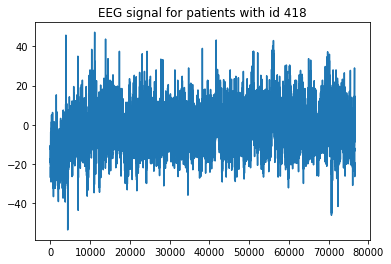

In [15]:
#Рисуем
data.iloc[:,0].plot(); plt.title('EEG signal for patients with id {}'.format(name));

Text(0.5,1,'ERP for all channels for patients with id 418')

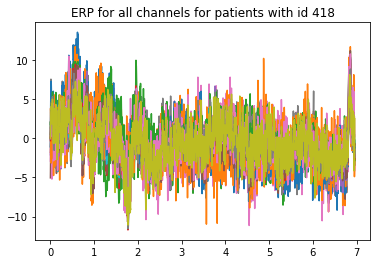

In [16]:
timeExp = np.arange(min_trial_len)*0.002
ERP = myExperiment.computeERP()
_=plt.plot(timeExp, ERP); plt.title('ERP for all channels for patients with id {}'.format(name))

In [17]:
#Запишем  все в словарь
res = defaultdict() 
res['timeExp(s)'] = timeExp
res['ERP'] = ERP

In [18]:
#Считаем вейвлет преобразование
freq,wt = myExperiment.wavelet_transform()

Compute channel:  1
Compute channel:  2
Compute channel:  3
Compute channel:  4
Compute channel:  5
Compute channel:  6
Compute channel:  7
Compute channel:  8
Compute channel:  9
Compute channel:  10
Compute channel:  11
Compute channel:  12
Compute channel:  13
Compute channel:  14
Compute channel:  15
Compute channel:  16
Compute channel:  17
Compute channel:  18
Compute channel:  19


In [ ]:
#Так выглядит вейвлет спектр до нормализации
#wt_ch = np.squeeze(wt[:, :, 18])
#temppower = np.median(np.absolute(np.reshape(wt_ch, [myExperiment.num_freq, min_trial_len, myExperiment.num_trials], order="F")) ** 2, axis=2)
#plt.contourf(timeExp, myExperiment.freq, 10*np.log10(temppower), cmap=plt.cm.jet )

### Normalization

$$db = 10\log 10\frac{activity_t}{mean(baseline)}$$ 


$$Z = \frac{activity_t-mean(baseline)}{std(baseline)}$$ 


In [19]:
#Нормируем относительно престимульного интервала. Получаем кандидата на дальнейшее использование
normwt = myExperiment.baseline_normalization()

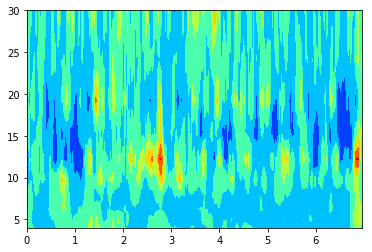

In [20]:
#а вот так он же но нрмированный
plt.contourf(timeExp, myExperiment.freq, normwt[:,:,18], cmap=plt.cm.jet )

In [21]:
res['patientsId'] = name
res['normWT'] = normwt
res['freq'] = freq
res.keys()

dict_keys(['ERP', 'normWT', 'patientsId', 'timeExp(s)', 'freq'])

### Блок с синхронизацией

In [22]:
chan_pairs = list()
chan_pairs_id = list()
chan_names = list(myExperiment.channelsName)
for i in range(0,19):
    for j in range (i+1,19):
        chan_pairs.append([[chan_names[i],chan_names[j]]])
        chan_pairs_id.append([i,j])   

In [23]:
PSdata = defaultdict()
PSdata['chan_pairs'] = chan_pairs
PSdata['chan_pairs_id'] = chan_pairs_id

In [39]:
#chan_pairs_id

In [28]:
num_points = 300
PSAllCh = np.zeros(shape = (myExperiment.num_freq, num_points, len(chan_pairs_id)), dtype=float)
for j in range(0, len(chan_pairs_id)): #len(chan_pairs_id)
    if (j%19 == 0):
        print('Compute coherence between : '+str(chan_pairs_id[j][0])+ ' and '+ str(chan_pairs_id[j][1])) 
    ispc = myExperiment.phase_coherence(chan_pairs_id[j][0],chan_pairs_id[j][1], num_points = num_points)
    PSAllCh[:,:,j] = ispc['ispc']

Compute coherence between : 0 and 1
Compute coherence between : 1 and 3
Compute coherence between : 2 and 6
Compute coherence between : 3 and 10
Compute coherence between : 4 and 15
Compute coherence between : 6 and 9
Compute coherence between : 7 and 17
Compute coherence between : 9 and 17
Compute coherence between : 12 and 15


In [29]:
PSdata['data'] = PSAllCh
PSdata['times'] = ispc['times']
res['PhaseSynchr'] = PSdata

In [31]:
#синхронизация 
res.keys()

dict_keys(['ERP', 'normWT', 'patientsId', 'timeExp(s)', 'PhaseSynchr', 'freq'])

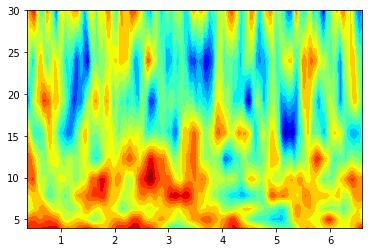

In [47]:
PSdata = res['PhaseSynchr']
plt.contourf(PSdata['times'] *0.002, myExperiment.freq, PSdata['data'][:,:,29],20,cmap=plt.cm.jet)

In [50]:
resname = 'ResultsData/'+ 'ResultD000'+str(name)+'.pickle'
with open(resname, 'wb') as f:
        pickle.dump(res, f)

In [93]:
# function for processing one people and write to file 

min_trial_len = 3480

def process_person(name, num_freq = 10, num_points =300):
    res = defaultdict() 
    resname = 'ResultsData/'+ 'ResultD000'+str(name)+'.pickle'
    if os.path.isfile(resname):
        print('Id already computed.....')
    else:    
        
        sigName, timingName, failedTrialsName = path_define(name)
        myExperiment = EEGAnalyser(srate = 500,min_freq = 4, max_freq=30, num_freq=num_freq)
        myExperiment.min_length = min_trial_len
        data = myExperiment.load_data(sigName, timingName, failedTrialsName)
        data = myExperiment.normalize_data()
        timeExp = np.arange(min_trial_len)*0.002
        ERP = myExperiment.computeERP()
        res['timeExp(s)'] = timeExp
        res['ERP'] = ERP
        print('Compute wavelet transform for id ...{}'.format(name))
        freq,wt = myExperiment.wavelet_transform()
        normwt = myExperiment.baseline_normalization()
        res['patientsId'] = name
        res['normWT'] = normwt
        res['freq'] = freq
        PSAllCh = np.zeros(shape = (myExperiment.num_freq, num_points, len(chan_pairs_id)), dtype=float)
        print('Compute phase synchronization for id {}...'.format(name))
        for j in range(0, len(chan_pairs_id)): 
            if (j%50 == 0):
                print('Compute coherence between : '+str(chan_pairs_id[j][0])+ ' and '+ str(chan_pairs_id[j][1])) 
            ispc = myExperiment.phase_coherence(chan_pairs_id[j][0],chan_pairs_id[j][1], num_points = num_points)
            PSAllCh[:,:,j] = ispc['ispc']
        PSdata['data'] = PSAllCh
        PSdata['times'] = ispc['times']
        res['PhaseSynchr'] = PSdata
   
        with open(resname, 'wb') as f:
            pickle.dump(res, f)   
    return res    

### All persons processing in group

In [94]:
name = 507
res = process_person(name, num_freq = 10, num_points =300)

Id already computed.....


In [91]:
name = 515
resname = 'ResultsData/'+ 'ResultD000'+str(name)+'.pickle'
os.path.isfile(resname)

False

In [89]:
Mem_names[13:]

[515, 521, 527, 535, 541, 555, 561, 567, 573, 579, 585, 591, 599, 605, 611]

In [96]:
for name in Sl_names:
    res = process_person(name, num_freq = 10, num_points =300)

Compute wavelet transform for id ...420
Compute channel:  1
Compute channel:  2
Compute channel:  3
Compute channel:  4
Compute channel:  5
Compute channel:  6
Compute channel:  7
Compute channel:  8
Compute channel:  9
Compute channel:  10
Compute channel:  11
Compute channel:  12
Compute channel:  13
Compute channel:  14
Compute channel:  15
Compute channel:  16
Compute channel:  17
Compute channel:  18
Compute channel:  19
Compute phase synchronization for id 420...
Compute coherence between : 0 and 1
Compute coherence between : 2 and 18
Compute coherence between : 6 and 14
Compute coherence between : 12 and 13
Compute wavelet transform for id ...434
Compute channel:  1
Compute channel:  2
Compute channel:  3
Compute channel:  4
Compute channel:  5
Compute channel:  6
Compute channel:  7
Compute channel:  8
Compute channel:  9
Compute channel:  10
Compute channel:  11
Compute channel:  12
Compute channel:  13
Compute channel:  14
Compute channel:  15
Compute channel:  16
Compute cha

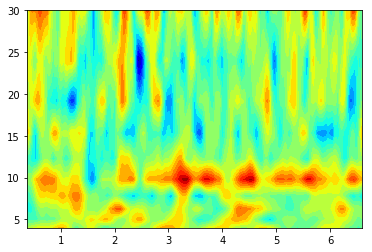

In [56]:
PSdata = res['PhaseSynchr']
plt.contourf(PSdata['times'] *0.002, myExperiment.freq, PSdata['data'][:,:,29],20,cmap=plt.cm.jet)

In [57]:
res.keys()

dict_keys(['ERP', 'normWT', 'patientsId', 'timeExp(s)', 'PhaseSynchr', 'freq'])

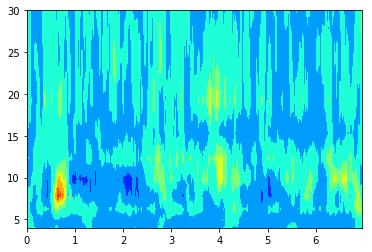

In [61]:
normWT = res['normWT']
plt.contourf(res['timeExp(s)'], res['freq'], normWT[:,:,10], cmap=plt.cm.jet )